# Training Model - Unbalance Data

# Import Library

In [30]:
#import all realated libraries
#import libraries for data analysis
import numpy as np
import pandas as pd

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import pickle and json file for columns and model file
import pickle
import json
import joblib

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# library for model selection and models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier

# evaluation metrics for classification model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import yaml
import scipy.stats as scs
import src.util as util
import yaml
import json
from datetime import datetime
from sklearn.metrics import classification_report
import uuid

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [31]:
config_data = util.load_config()

In [33]:
config_data["train_tfidf_set_path"][0]

'dataset/3 - final/X_train_tfidf.pkl'

## Read Data

In [35]:
#Read data X_train dan y_sm hasil dari data preparation
X_train_clean = joblib.load(config_data["train_tfidf_set_path"][0])
y_train = joblib.load(config_data["train_tfidf_set_path"][1])

#Read data X_valid dan y_valid hasil dari data preparation
X_valid_clean = joblib.load(config_data["valid_tfidf_set_path"][0])
y_valid = joblib.load(config_data["valid_tfidf_set_path"][1])

#Read data X_test dan y_test hasil dari data preparation
X_test_clean = joblib.load(config_data["test_tfidf_set_path"][0])
y_test = joblib.load(config_data["test_tfidf_set_path"][1])

## Baseline Model

In [36]:
y_baseline_predict = y_train.mean()
y_baseline_predict

0.7461428571428571

## Best Model

In [63]:
from sklearn.svm import SVC

def binary_classification_svc_tuned(x_train, y_train, x_valid, y_valid, x_test, y_test):
    # Set hyperparameters for Support Vector Classifier (SVC)
    svc_params = {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear','probability':True}
    
    # Instantiate the SVC classifier
    svc_classifier = SVC(**svc_params, random_state=123)
    
    svc_classifier.fit(x_train, y_train)
    
    # Evaluate on the validation set
    valid_pred = svc_classifier.predict(x_valid)
    report = classification_report(y_valid, valid_pred, output_dict=True)
    valid_recall = report['weighted avg']['recall']
    valid_precision = report['weighted avg']['precision']
    print('Validation recall:', valid_recall)
    print('Validation precision:', valid_precision)
    
    # Evaluate on the test set
    test_pred = svc_classifier.predict(x_test)
    report = classification_report(y_test, test_pred, output_dict=True)
    test_recall = report['weighted avg']['recall']
    test_precision = report['weighted avg']['precision']
    print('Test recall:', test_recall)
    print('Test precision:', test_precision)
    
    return svc_classifier

In [64]:
svc_best = binary_classification_svc_tuned(x_train=X_train_clean, y_train=y_train,
                                           x_valid=X_valid_clean, y_valid=y_valid,
                                           x_test=X_test_clean, y_test=y_test)

Validation recall: 0.8483333333333334
Validation precision: 0.8426421516546649
Test recall: 0.8438888888888889
Test precision: 0.8377652832427974


In [54]:
valid_pred = svc_best.predict(X_valid_clean)
test_pred = svc_best.predict(X_test_clean)

valid_acc = accuracy_score(y_valid, valid_pred)
test_acc = accuracy_score(y_test, test_pred)

In [55]:
valid_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [56]:
test_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [57]:
valid_acc

0.8483333333333334

In [58]:
test_acc

0.8438888888888889

In [59]:
print(classification_report(y_valid, valid_pred))

              precision    recall  f1-score   support

           0       0.79      0.55      0.65       305
           1       0.86      0.95      0.90       895

    accuracy                           0.85      1200
   macro avg       0.82      0.75      0.78      1200
weighted avg       0.84      0.85      0.84      1200



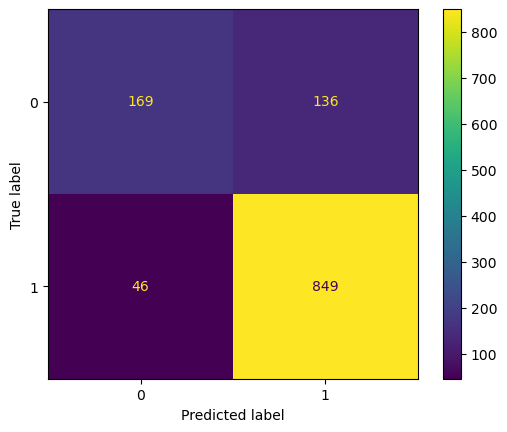

In [60]:
ConfusionMatrixDisplay.from_predictions(y_valid, valid_pred)
plt.show()

AUC: 0.8743035076472204


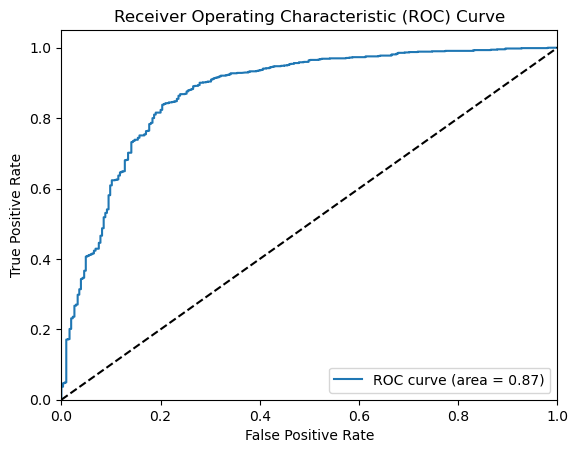

In [67]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for the positive class
probs = svc_best.predict_proba(X_valid_clean)[:, 1]

# calculate fpr and tpr for various thresholds
fpr, tpr, thresholds = roc_curve(y_valid, probs)

# calculate AUC
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
#plt.savefig('roc_auc.png')
plt.show()

In [69]:
test_pred = svc_best.predict(X_test_clean)
test_acc = accuracy_score(y_test, test_pred)

In [70]:
test_acc

0.8438888888888889

In [71]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64       457
           1       0.86      0.95      0.90      1343

    accuracy                           0.84      1800
   macro avg       0.82      0.74      0.77      1800
weighted avg       0.84      0.84      0.83      1800



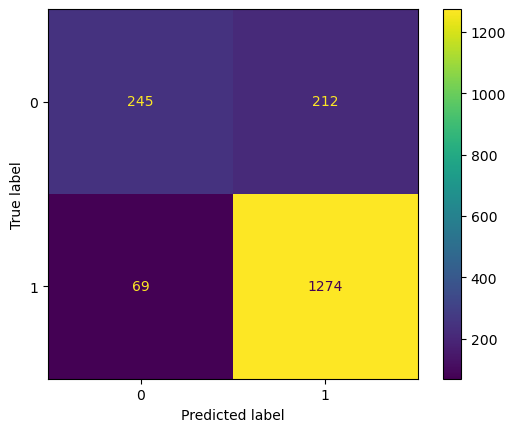

In [72]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred)
plt.show()

AUC: 0.871736257863531


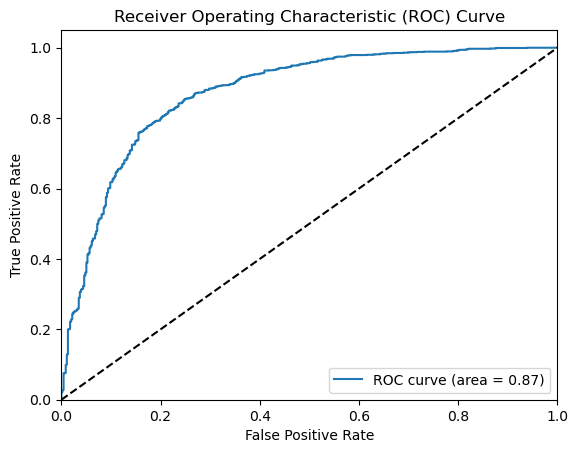

In [73]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for the positive class
probs = svc_best.predict_proba(X_test_clean)[:, 1]

# calculate fpr and tpr for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# calculate AUC
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
#plt.savefig('roc_auc.png')
plt.show()

## Save Log Best Model

In [74]:
def save_model_log(model, model_name, X_test, y_test):
    # generate unique id
    model_uid = uuid.uuid4().hex
    
    # get current time and date
    now = datetime.now()
    training_time = now.strftime("%H:%M:%S")
    training_date = now.strftime("%Y-%m-%d")
    
    # generate classification report
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # create dictionary for log
    log = {"model_name": model_name,
           "model_uid": model_uid,
           "training_time": training_time,
           "training_date": training_date,
           "classification_report": report}
    
    # menyimpan log sebagai file JSON
    with open('training_log/training_log.json', 'w') as f:
        json.dump(log, f)

In [76]:
save_model_log(model = svc_best, model_name = "SVC Best", X_test = X_test_clean, y_test=y_test)

## Evaluation Metrics

In [77]:
import pandas as pd
from sklearn.metrics import classification_report

# definisikan model-model yang ingin dibandingkan
models = {
          'SVC Best':svc_best
         }

# loop untuk menghitung dan menyimpan metrik untuk setiap model
results = {}
for name, model in models.items():
    # hitung prediksi pada data test
    y_pred = model.predict(X_test_clean)
    # hitung metrik
    report = classification_report(y_test, y_pred, output_dict=True)
    # simpan metrik ke dictionary
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score'],
        'accuracy': report['accuracy'],
        'macro_avg_precision': report['macro avg']['precision'],
        'macro_avg_recall': report['macro avg']['recall'],
        'macro_avg_f1_score': report['macro avg']['f1-score'],
        'weighted_avg_precision': report['weighted avg']['precision'],
        'weighted_avg_recall': report['weighted avg']['recall'],
        'weighted_avg_f1_score': report['weighted avg']['f1-score']
    }

# buat dataframe dari dictionary
df_results = pd.DataFrame.from_dict(results, orient='index')

# tampilkan dataframe sebagai tabel
df_results

,precision,recall,f1_score,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1_score
SVC Best,0.837765,0.843889,0.833357,0.843889,0.818795,0.742364,0.768105,0.837765,0.843889,0.833357


# Save Model

## SVC Model

In [82]:
svc_best_cv = 'model/svc_best_cv.pkl'
with open(svc_best_cv, 'wb') as file:
    pickle.dump(svc_best, file)

## Cara Load Model

In [ ]:
# Load model dari folder models
"""
filename = 'models/model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
"""